## SVM

In [365]:
## Modules or libraries required for SVM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,precision_recall_curve
from sklearn.decomposition import PCA
# from sklearn.metrics import plot_confusion_matrix

In [366]:
df = pd.read_excel('Data/default of credit card clients.xls', header=1)

In [367]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [369]:
df.rename({'default payment next month' : 'Default'},axis=1,inplace = True)

In [370]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [371]:
df.drop('ID', inplace =True,axis = 1)

In [372]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Missing Data

In [373]:
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
Default      int64
dtype: object

In [374]:
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Default      0
dtype: int64

# No null values in data

In [375]:
df['SEX'].unique()

array([2, 1])

In [376]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [377]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [378]:
len(df.loc[(df['EDUCATION'] == 0 ) | (df['MARRIAGE'] == 0)])

68

In [379]:
print(len(df))
print(df.shape)

30000
(30000, 24)


# We are considering 0 uique values as a null value
# and handle them by dropping those rows

In [380]:
df_no_missing = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]
print(len(df_no_missing))

29932


In [381]:
# we can do it by subsetting in this way
df[(df['MARRIAGE'] != 0) & (df['EDUCATION'] != 0)]


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [382]:
df_no_missing['MARRIAGE'].unique()

array([1, 2, 3])

In [383]:
df_no_default = df_no_missing[df_no_missing['Default'] == 0]
df_default = df_no_missing[df_no_missing['Default'] == 1]

In [384]:
print(len(df_no_default))
print(len(df_default))

23301
6631


## Downsample df_no_default and df_default

In [385]:
df_no_default_downsampled = resample(df_no_default, replace = False, n_samples = 1000, random_state=43)
print(len(df_no_default_downsampled))

1000


In [386]:
df_default_downsampled = resample(df_default, replace =False, n_samples= 1000, random_state= 42)
print(len(df_default_downsampled))

1000


In [387]:
df_downsample = pd.concat([df_default_downsampled,df_no_default_downsampled])
print(len(df_downsample))

2000


## Seperation of labelled data and unlabelled data

In [388]:
X = df_downsample.drop('Default',axis = 1).copy()
print(X.head())

       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
19982     300000    2          1         1   47      3      2      2      2   
19350      80000    2          2         2   36      2      0      0     -2   
17057      30000    2          3         2   22      2      2      0      0   
26996      80000    1          1         2   34      2      2      2      2   
23621     210000    2          3         1   44     -2     -2     -2     -2   

       PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
19982      2  ...       5000       5000       5000       5000         0   
19350     -2  ...          0          0          0          0      1700   
17057      0  ...      29047      29507      11609      11711         0   
26996      2  ...      63827      64682      65614      67007      2800   
23621     -2  ...      17706          0       5646      14793     13462   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
19982         0 

In [389]:
y = df_downsample['Default'].copy()
print(y.head())

19982    1
19350    1
17057    1
26996    1
23621    1
Name: Default, dtype: int64


## OHE 

In [390]:
pd.get_dummies(X['MARRIAGE'], columns=['MARRIAGE']).astype('int').head()

,1,2,3
19982,1,0,0
19350,0,1,0
17057,0,1,0
26996,0,1,0
23621,1,0,0


In [391]:
X_encoded = pd.get_dummies(X, columns=['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_3','PAY_2','PAY_4','PAY_5','PAY_6']).astype(int)
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
19982,300000,47,5000,5000,5000,5000,5000,5000,0,0,...,0,0,0,0,1,0,0,0,0,0
19350,80000,36,19671,20650,0,0,0,0,1700,0,...,0,1,0,0,0,0,0,0,0,0
17057,30000,22,29793,29008,29047,29507,11609,11711,0,1687,...,0,0,0,1,0,0,0,0,0,0
26996,80000,34,61231,62423,63827,64682,65614,67007,2800,3000,...,0,0,0,0,1,0,0,0,0,0
23621,210000,44,11771,13462,17706,0,5646,14793,13462,17706,...,0,1,0,0,0,0,0,0,0,0


In [392]:
X_encoded.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_1', 'SEX_2', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5',
       'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_0_-2',
       'PAY_0_-1', 'PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4',
       'PAY_0_5', 'PAY_0_6', 'PAY_0_7', 'PAY_0_8', 'PAY_3_-2', 'PAY_3_-1',
       'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5',
       'PAY_3_6', 'PAY_3_7', 'PAY_2_-2', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1',
       'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7',
       'PAY_4_-2', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4',
       'PAY_4_5', 'PAY_4_7', 'PAY_5_-2', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2',
       'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_6_-2',
       'PAY_6_-1', 'PAY_6_0', 'PAY_6_2'

In [393]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y, random_state=42, test_size=0.3)

In [394]:
from sklearn.preprocessing import scale

In [395]:
std_scale = StandardScaler()
# X_trained_scaled = std_scale.fit_transform(X_train)
# X_test_scaled = std_scale.transform(X_test)
X_trained_scaled = scale(X_train)
X_test_scaled = scale(X_test)

## Building Preliminary SVM

In [396]:
model1 = SVC(random_state=42)
model1.fit(X_trained_scaled,y_train)

SVC(random_state=42)

In [397]:
y_pred_model1 = model1.predict(X_test_scaled)

In [398]:
accuracy_score(y_test,y_pred_model1)

0.745

In [405]:
print(classification_report(y_test,y_pred_model1))

              precision    recall  f1-score   support

           0       0.71      0.83      0.76       298
           1       0.80      0.66      0.72       302

    accuracy                           0.74       600
   macro avg       0.75      0.75      0.74       600
weighted avg       0.75      0.74      0.74       600



In [402]:
confusion_matrix(y_test,y_pred_model1)

array([[248,  50],
       [103, 199]])

<Axes: >

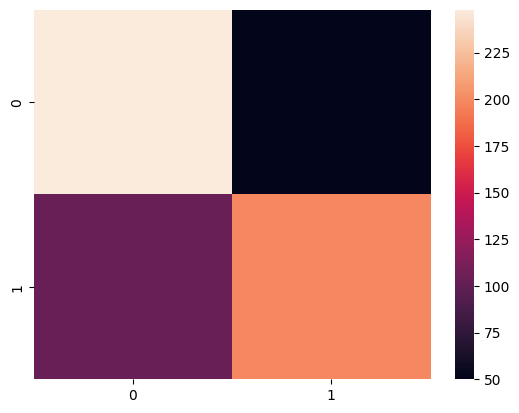

In [404]:
sns.heatmap(confusion_matrix(y_test,y_pred_model1))